In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/climate dataset/GlobalTemperatures.csv')

Mounted at /content/drive


In [ ]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [ ]:
# Get unique city names
unique_cities = df['City'].unique()
print(unique_cities)

['Århus' 'Çorlu' 'Çorum' ... 'Zurich' 'Zuwarah' 'Zwolle']


In [ ]:
import pandas as pd

# Checking for missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print(missing_percentage)

dt                                            0.000000
LandAverageTemperature                        0.375940
LandAverageTemperatureUncertainty             0.375940
LandMaxTemperature                           37.593985
LandMaxTemperatureUncertainty                37.593985
LandMinTemperature                           37.593985
LandMinTemperatureUncertainty                37.593985
LandAndOceanAverageTemperature               37.593985
LandAndOceanAverageTemperatureUncertainty    37.593985
dtype: float64


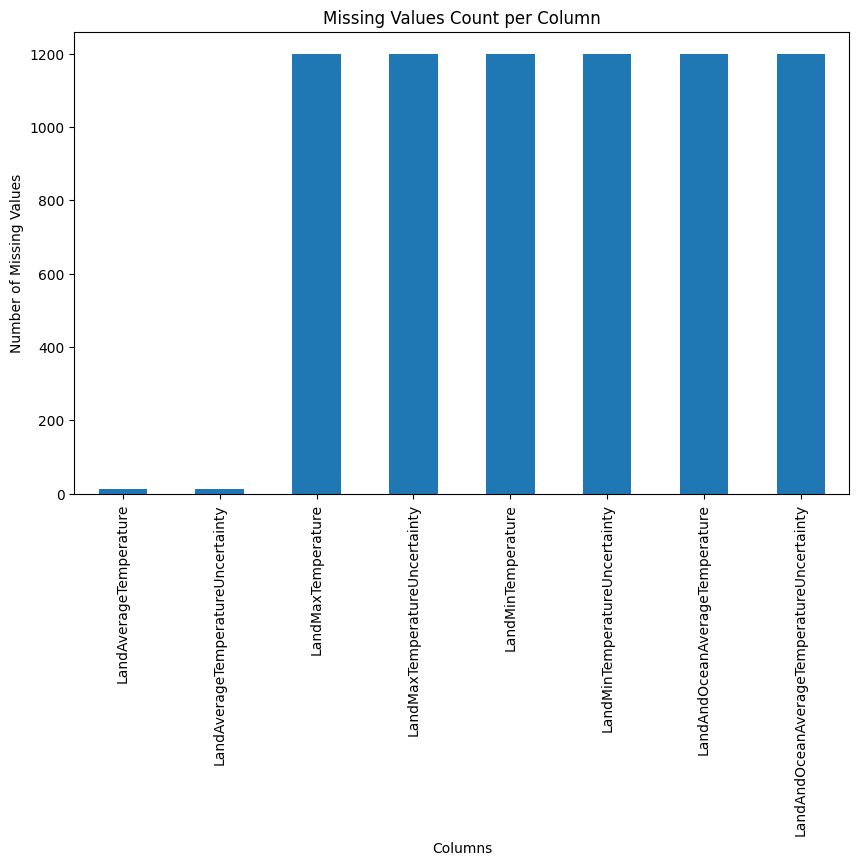

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Plot a bar chart to visualize missing values
missing_values[missing_values > 0].plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()


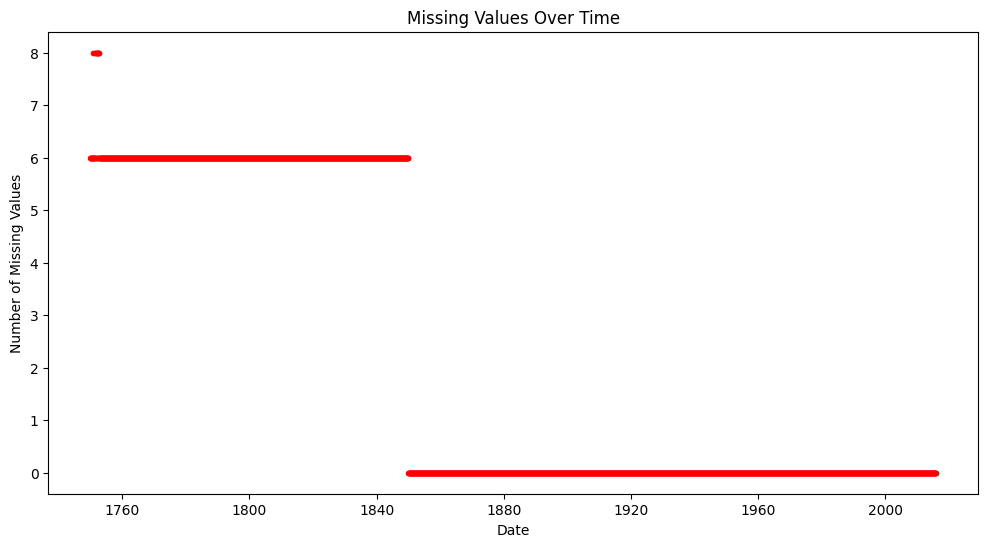

In [ ]:
# Assuming 'Date' column is set as datetime
df['dt'] = pd.to_datetime(df['dt'])

# Set 'Date' as the index for easier plotting over time
df.set_index('dt', inplace=True)

# Plot missing values over time
plt.figure(figsize=(12, 6))
plt.plot(df.isnull().sum(axis=1), 'r.')
plt.title('Missing Values Over Time')
plt.ylabel('Number of Missing Values')
plt.xlabel('Date')
plt.show()


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Total missing values
total_missing = missing_values.sum()

# Percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100

# Display missing values with percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_data)


                               Missing Values  Percentage
AverageTemperature                      11002    4.599941
AverageTemperatureUncertainty           11002    4.599941


In [ ]:
num_rows = df.shape[0]
print("Total number of rows:", num_rows)

Total number of rows: 239177


In [ ]:
print("First Row:")
for column, value in df.iloc[0].items():
  print(f"{column}: {value}")

print("\nLast Row:")
for column, value in df.iloc[-1].items():
  print(f"{column}: {value}")


First Row:
dt: 1849-01-01
AverageTemperature: 26.704
AverageTemperatureUncertainty: 1.435
City: Abidjan
Country: Côte D'Ivoire
Latitude: 5.63N
Longitude: 3.23W

Last Row:
dt: 2013-09-01
AverageTemperature: nan
AverageTemperatureUncertainty: nan
City: Xian
Country: China
Latitude: 34.56N
Longitude: 108.97E


In [ ]:
import pandas as pd

# Define two dates in the format 'YYYY-MM-DD'
start = df.iloc[0]['dt']
end = df.iloc[-1]['dt']

print(start)
print(end)

# Convert the strings to datetime format
start_date = pd.to_datetime(start)
end_date = pd.to_datetime(end)

# Calculate the difference (time duration) between the two dates
duration = end_date - start_date

# Output the duration in days
print(f"{duration.days} days")


1750-01-01
2015-12-01
97123 days


*97123 is 266 years*


---


*266 years is 3192 month*


---


*apparently there is no missing date in this time period*

In [ ]:
df['dt'] = pd.to_datetime(df['dt'])
df['Month'] = df['dt'].dt.month
grouped_by_month = df.groupby('Month')


In [ ]:
# Create a dictionary to store DataFrames for each month
monthly_data = {}

# Loop through each month and store the data in the dictionary
for month, data in grouped_by_month:
    monthly_data[month] = data

In [ ]:
january_data = monthly_data[0]
print(january_data.head())  # Preview the first few rows for January

           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
11 1750-12-01                   2.772                              2.970   
23 1751-12-01                     NaN                                NaN   
35 1752-12-01                   5.086                              2.982   
47 1753-12-01                   0.559                              4.174   
59 1754-12-01                   4.587                              3.299   

    LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
11                 NaN                            NaN                 NaN   
23                 NaN                            NaN                 NaN   
35                 NaN                            NaN                 NaN   
47                 NaN                            NaN                 NaN   
59                 NaN                            NaN                 NaN   

    LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
11         

In [ ]:
# Save each month's data to a separate CSV
for month, data in monthly_data.items():
    data.to_csv(f'month_{month}.csv', index=False)


In [ ]:
# Count missing values in each column for January
january_missing = january_data.isnull().sum()
print('January missing value: ')
print(january_missing)

December missing value: 
dt                                             0
LandAverageTemperature                         1
LandAverageTemperatureUncertainty              1
LandMaxTemperature                           100
LandMaxTemperatureUncertainty                100
LandMinTemperature                           100
LandMinTemperatureUncertainty                100
LandAndOceanAverageTemperature               100
LandAndOceanAverageTemperatureUncertainty    100
Month                                          0
dtype: int64


In [ ]:
print(len(january_data))

266
